# Exploratory Analysis - Coding Challenge
<hr style="border:2px solid black">

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('ggplot')
# data processing libraries
import numpy as np
import pandas as pd

# plotting libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine-learning libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise
#from scipy.sparse import csr_matrix

# miscellaneous
import pickle

import numpy as np
from sklearn.decomposition import NMF 
import pandas as pd

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [297]:
movies = pd.read_csv('data/movies.csv')
rate = pd.read_csv('data/ratings.csv')
tags = pd.read_csv('data/tags.csv')
links = pd.read_csv('data/links.csv')

In [298]:
df = movies.merge(rate, on='movieId')
df = df.merge(tags, on='movieId')
df = df.merge(links, on='movieId')

In [299]:
df.head(3)

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013,114709,862.0


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [300]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [301]:
print(rate['userId'].nunique())
print(movies['movieId'].nunique())

610
9742


#### What is the average rating

In [302]:
rate['rating'].mean()

3.501556983616962

#### which rating appears the most?

In [303]:
rate['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [304]:
((rate['rating'] == 5).sum())/(rate['rating'].value_counts().sum())

0.13101471696616288

---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [305]:
dfusercount = rate.groupby(['userId','movieId']).count()

In [306]:
len(dfusercount)/rate['userId'].nunique()

165.30491803278687

- How many users have rated more than 20 movies?

In [307]:
rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [308]:
dfusercount2 = rate.groupby(['userId'])['rating'].count()
dfusercount2

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [309]:
(dfusercount2 > 20).sum()

596

In [310]:
(dfusercount2 > 20).index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
      dtype='int64', name='userId', length=610)

- How many movies rated the user with the most/ least ratings?

In [311]:
dfusercount

rating  timestamp
userId movieId                   
1      1             1          1
       3             1          1
       6             1          1
       47            1          1
       50            1          1
...                ...        ...
610    166534        1          1
       168248        1          1
       168250        1          1
       168252        1          1
       170875        1          1

[100836 rows x 2 columns]

In [312]:
rate.groupby(['userId'])['rating'].count().sort_values()

userId
442      20
406      20
147      20
194      20
569      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: rating, Length: 610, dtype: int64

In [313]:
rate.groupby(['userId'])['rating'].sum().sort_values()

userId
442      25.5
508      51.5
431      54.5
293      55.0
245      57.0
        ...  
610    4802.5
448    5307.5
599    6547.0
474    7165.0
414    9151.5
Name: rating, Length: 610, dtype: float64

In [314]:
userratenr = rate.groupby(['userId'])['rating'].count()
print(userratenr.loc[442])
print(userratenr.loc[53])

20
20


-  What is the *median* number of ratings?

In [315]:
median = rate.groupby(['userId'])['rating'].count().median()

In [316]:
median

70.5

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

In [317]:
dfusercount2

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [318]:
liste = dfusercount2.tolist()

In [319]:
liste

[232,
 29,
 39,
 216,
 44,
 314,
 152,
 47,
 46,
 140,
 64,
 32,
 31,
 48,
 135,
 98,
 105,
 502,
 703,
 242,
 443,
 119,
 121,
 110,
 26,
 21,
 135,
 570,
 81,
 34,
 50,
 102,
 156,
 86,
 23,
 60,
 21,
 78,
 100,
 103,
 217,
 440,
 114,
 48,
 399,
 42,
 140,
 33,
 21,
 310,
 359,
 130,
 20,
 33,
 25,
 46,
 476,
 112,
 107,
 22,
 39,
 366,
 271,
 517,
 34,
 345,
 36,
 1260,
 46,
 62,
 35,
 45,
 210,
 177,
 69,
 119,
 29,
 61,
 64,
 167,
 26,
 227,
 118,
 293,
 34,
 70,
 21,
 56,
 518,
 54,
 575,
 24,
 97,
 56,
 168,
 78,
 36,
 92,
 53,
 148,
 61,
 56,
 377,
 273,
 722,
 33,
 34,
 76,
 127,
 51,
 646,
 65,
 150,
 31,
 112,
 87,
 165,
 22,
 215,
 22,
 58,
 292,
 56,
 50,
 360,
 38,
 22,
 33,
 140,
 28,
 69,
 347,
 35,
 35,
 279,
 111,
 141,
 22,
 194,
 608,
 168,
 38,
 71,
 128,
 23,
 32,
 20,
 48,
 58,
 26,
 59,
 63,
 179,
 34,
 46,
 398,
 21,
 26,
 97,
 437,
 39,
 38,
 23,
 36,
 65,
 190,
 173,
 94,
 269,
 50,
 82,
 26,
 25,
 67,
 24,
 36,
 904,
 77,
 69,
 24,
 118,
 977,
 57,
 134,
 4

<Axes: xlabel='userId'>

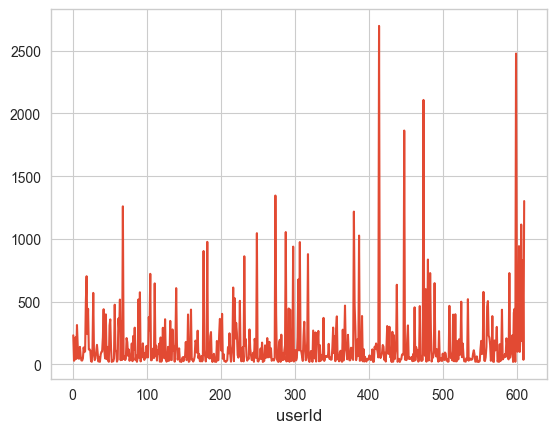

In [320]:
dfusercount2.plot()

<Axes: ylabel='Count'>

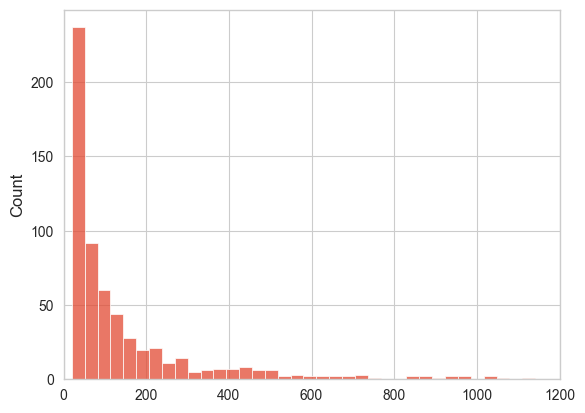

In [321]:
plt.xlim(0,1200)
sns.histplot(liste)


---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [322]:
rate.groupby(['userId'])['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

- Which user gave the worst ratings on average, which user gave the best ratings?

In [323]:
rate.groupby(['userId'])['rating'].mean().min()

1.275

In [324]:
rate.groupby(['userId'])['rating'].mean().sort_values()

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
567    2.245455
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 610, dtype: float64

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

- Plot the distribution of average ratings! How would you characterize the distribution?

<Axes: ylabel='Count'>

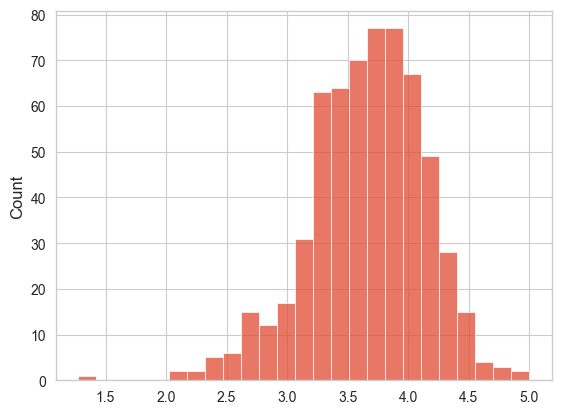

In [325]:
avg_user_rate =rate.groupby(['userId'])['rating'].mean()
list_avg = avg_user_rate.tolist()
sns.histplot(list_avg)

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [326]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [327]:
double = movies[movies.duplicated(['title'])]
len(double)

5

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [328]:
id_difference = len(movies[movies["movieId"].isin(rate["movieId"])])-len(movies["movieId"])
id_difference

-18

<Axes: xlabel='userId'>

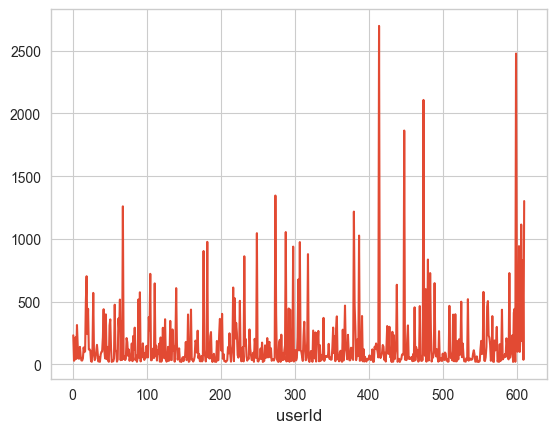

In [329]:
dfusercount2.plot()

In [330]:
#(movies['movieId'].isin(rate['movieId']))
print(len(movies['movieId']))
print((rate['movieId']).value_counts())

9742
movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [331]:
dfmr = movies.merge(rate, on='movieId')


---
#### Count the number of ratings per movie title!

In [332]:
rcount = dfmr.groupby(['title'])['rating'].count().sort_values(ascending=False)
rcount

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

- What are the top 10 most rated movies in the dataset?

In [333]:
rcount.sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [334]:
dfmr

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [335]:
dfmr

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [336]:
dfmr['rcount'] = ((rate['movieId']).value_counts())

timean = dfmr.groupby(['title'])['rating'].mean()
tistd = dfmr.groupby(['title'])['rating'].std()
#dfmr.std(['rating'])
#dfmr["Std Dev / Avg Rating"] = df["Standard Deviation"] / df["Rating"].mean()

In [337]:
'''
- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
'''
ti_mean = dfmr.groupby(['title'])['rating'].mean()
ti_std = dfmr.groupby(['title'])['rating'].std()
covar = ti_std/ti_mean
covar.sort_values(ascending=False)


title
Fanny and Alexander (Fanny och Alexander) (1982)                      1.157084
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962)    1.157084
Emma (2009)                                                           1.131371
Kwaidan (Kaidan) (1964)                                               1.131371
The Cloverfield Paradox (2018)                                        1.099944
                                                                        ...   
Zoom (2006)                                                                NaN
Zoom (2015)                                                                NaN
Zulu (2013)                                                                NaN
anohana: The Flower We Saw That Day - The Movie (2013)                     NaN
À nous la liberté (Freedom for Us) (1931)                                  NaN
Name: rating, Length: 9719, dtype: float64

In [338]:

dnew_df = (rate['movieId']).unique()

In [339]:
len(dnew_df)
#condition = dfmr[dfmr.groupby(['title'])['rating'].count()] > 100

9724

In [340]:
test = tistd / timean

In [341]:
test

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                       0.000000
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                    0.353553
                                               ...   
eXistenZ (1999)                              0.208218
xXx (2002)                                   0.348851
xXx: State of the Union (2005)               0.250000
¡Three Amigos! (1986)                        0.301156
À nous la liberté (Freedom for Us) (1931)         NaN
Name: rating, Length: 9719, dtype: float64

test

---

#### Calculate the average rating per movie title!

In [342]:
avg_title_r = dfmr.groupby(['title'])['rating'].mean()
avg_title_r

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

- Make a visualization of the distribution of average ratings per movie

(array([ 108.,  185.,  309.,  694.,  961., 1840., 2208., 2274.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

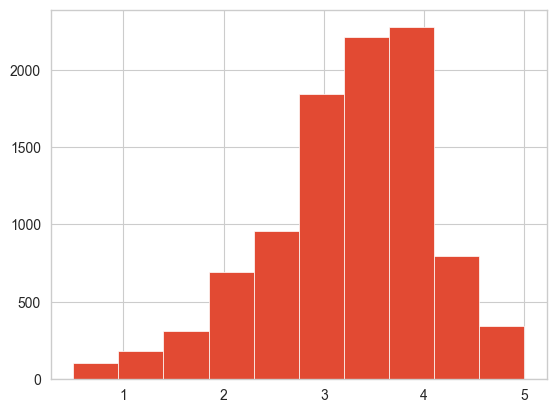

In [343]:
plt.hist((avg_title_r), bins=10)

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [344]:
avg_title_r = dfmr.groupby(['title'])['rating'].mean().sort_values(ascending=False)
avg_title_r

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!

In [345]:
rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [346]:
dfmr

,movieId,title,genres,userId,rating,timestamp,rcount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,110.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,52.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,7.0
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,NaN
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,NaN
100833,193585,Flint (2017),Drama,184,3.5,1537109805,NaN
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,NaN


In [347]:
# calculate the number of ratings per movie
rating_count = rate.groupby('movieId')[['rating']].count()
rating_count

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [348]:
# filter for movies with more than 20 ratings and extract the index
popular_movies = rating_count[rating_count['rating']>20].index

# filter the ratings matrix and only keep the popular movies
dfn = rate[rate['movieId'].isin(popular_movies)].copy()

# need to remake user ids and movie ids since they are not sequential
user_ids = dfn['userId'].unique()
user_id_map = {v:k for k,v in enumerate(user_ids)}
dfn['userId'] = dfn['userId'].map(user_id_map)


movie_ids = dfn['movieId'].unique()
movie_id_map = {v:k for k,v in enumerate(movie_ids)}
dfn['movieId'] = dfn['movieId'].map(movie_id_map)

# Initialize a sparse user-item rating matrix
# (data, (row_ind, col_ind) from scipy.sparse import csr_matrix
from scipy.sparse import csr_matrix
R = csr_matrix((dfn['rating'], (dfn['userId'], dfn['movieId']))) 

#if all is well, the shape of the user-item matrix R will be (610, 1235)


#the movies.csv file should also the transformed accordingly

# filter out unpopular movies
movies = movies[movies['movieId'].isin(movie_ids)]
# redefine movie ids
movies['movieId'] = movies['movieId'].map(movie_id_map)

C:\Users\mlomm\AppData\Local\Temp\ipykernel_19960\1558271325.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['movieId'] = movies['movieId'].map(movie_id_map)


In [349]:
R.shape

(610, 1235)

In [350]:
dfn

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931
...,...,...,...,...
100803,609,808,4.0,1493847175
100808,609,643,4.0,1493846503
100829,609,809,5.0,1493845631
100830,609,644,4.0,1493879365


In [351]:
rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [352]:
movies

,movieId,title,genres
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,325,Jumanji (1995),Adventure|Children|Fantasy
2,1,Grumpier Old Men (1995),Comedy|Romance
4,326,Father of the Bride Part II (1995),Comedy
5,2,Heat (1995),Action|Crime|Thriller
...,...,...,...
9162,808,"Big Short, The (2015)",Drama
9223,643,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
9392,809,Arrival (2016),Sci-Fi
9433,644,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi


In [353]:
Rt= R.todense()
Rt

matrix([[4. , 4. , 4. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [2.5, 2. , 0. , ..., 1. , 1.5, 0. ],
        [3. , 0. , 0. , ..., 0. , 0. , 0. ],
        [5. , 0. , 5. , ..., 3. , 0. , 0. ]])

In [354]:
dfn

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931
...,...,...,...,...
100803,609,808,4.0,1493847175
100808,609,643,4.0,1493846503
100829,609,809,5.0,1493845631
100830,609,644,4.0,1493879365


In [355]:
movies

,movieId,title,genres
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,325,Jumanji (1995),Adventure|Children|Fantasy
2,1,Grumpier Old Men (1995),Comedy|Romance
4,326,Father of the Bride Part II (1995),Comedy
5,2,Heat (1995),Action|Crime|Thriller
...,...,...,...
9162,808,"Big Short, The (2015)",Drama
9223,643,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
9392,809,Arrival (2016),Sci-Fi
9433,644,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi


In [356]:
rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [357]:
dfn

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931
...,...,...,...,...
100803,609,808,4.0,1493847175
100808,609,643,4.0,1493846503
100829,609,809,5.0,1493845631
100830,609,644,4.0,1493879365


In [358]:
dfu = dfn.groupby(['userId'])['rating'].mean()
dfu

userId
0      4.422222
1      3.934783
2      1.568182
3      3.544118
4      3.609756
         ...   
605    3.666300
606    3.742857
607    3.271945
608    3.280000
609    3.957529
Name: rating, Length: 610, dtype: float64

In [359]:
movies

,movieId,title,genres
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,325,Jumanji (1995),Adventure|Children|Fantasy
2,1,Grumpier Old Men (1995),Comedy|Romance
4,326,Father of the Bride Part II (1995),Comedy
5,2,Heat (1995),Action|Crime|Thriller
...,...,...,...
9162,808,"Big Short, The (2015)",Drama
9223,643,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
9392,809,Arrival (2016),Sci-Fi
9433,644,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi


In [360]:
Rt = pd.DataFrame(data=Rt, columns=movies['title'],index = dfu.index)
Rt

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),GoldenEye (1995),"American President, The (1995)",Casino (1995),Sense and Sensibility (1995),...,Captain America: Civil War (2016),Doctor Strange (2016),The Martian (2015),Inside Out (2015),The Revenant (2015),"Big Short, The (2015)",Zootopia (2016),Arrival (2016),Rogue One: A Star Wars Story (2016),Logan (2017)
userId,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,0.0,0.0,3.0,4.5,4.0,0.0,3.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2.5,2.0,0.0,4.5,4.5,3.0,0.0,4.0,0.0,3.0,...,0.0,0.5,0.0,0.0,4.5,0.0,2.5,1.0,1.5,0.0


In [361]:
model = NearestNeighbors(metric='cosine')

# fit it to the Ratings matrix
model.fit(Rt)

NearestNeighbors(metric='cosine')

In [362]:
with open('./distance_recommender.pkl', 'wb') as file:
    pickle.dump(model, file)

In [363]:
with open('./distance_recommender.pkl', 'rb') as file:
    modelnn = pickle.load(file)

In [364]:
nmf_model = NMF(n_components=1500, max_iter=1000, tol=0.001)

In [365]:
nmf_model.fit(R)

NMF(max_iter=1000, n_components=1500, tol=0.001)

In [389]:
Q_matrix = nmf_model.components_
Q = pd.DataFrame(Q_matrix, columns=movies['title'], index=nmf_model.get_feature_names_out())
Q

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),GoldenEye (1995),"American President, The (1995)",Casino (1995),Sense and Sensibility (1995),...,Captain America: Civil War (2016),Doctor Strange (2016),The Martian (2015),Inside Out (2015),The Revenant (2015),"Big Short, The (2015)",Zootopia (2016),Arrival (2016),Rogue One: A Star Wars Story (2016),Logan (2017)
nmf0,0.014666,0.000000,0.000000,0.020833,0.001955,0.000000,0.000000e+00,0.011014,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf1,0.019062,0.000299,0.000000,0.006224,0.008018,0.000000,0.000000e+00,0.011936,0.0,0.002212,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf2,0.000000,0.037354,0.000000,0.002056,0.000000,0.000000,0.000000e+00,0.032204,0.0,0.033628,...,0.011594,0.000000e+00,0.030898,0.0,0.000000,0.0,0.0,0.001019,0.0,0.000000
nmf3,0.000000,0.000000,0.000000,0.158796,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf4,0.000000,0.000000,0.022405,0.042657,0.072894,0.000000,0.000000e+00,0.088038,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000140,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nmf1495,0.000000,0.000164,0.000000,0.000000,0.000000,0.000000,1.156374e-07,0.000000,0.0,0.000000,...,0.000000,1.678759e-05,0.000000,0.0,0.006814,0.0,0.0,0.000000,0.0,0.000000
nmf1496,0.025992,0.000000,0.000000,0.000000,0.000000,0.178369,0.000000e+00,0.285603,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000001
nmf1497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf1498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [367]:
P_matrix = nmf_model.transform(Rt)
P_matrix

C:\Users\mlomm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but NMF was fitted without feature names
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.0197895 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.56373574, 0.        , 0.        , ..., 0.03667409, 0.        ,
        0.07122133],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [368]:
Rt

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),GoldenEye (1995),"American President, The (1995)",Casino (1995),Sense and Sensibility (1995),...,Captain America: Civil War (2016),Doctor Strange (2016),The Martian (2015),Inside Out (2015),The Revenant (2015),"Big Short, The (2015)",Zootopia (2016),Arrival (2016),Rogue One: A Star Wars Story (2016),Logan (2017)
userId,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,0.0,0.0,3.0,4.5,4.0,0.0,3.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2.5,2.0,0.0,4.5,4.5,3.0,0.0,4.0,0.0,3.0,...,0.0,0.5,0.0,0.0,4.5,0.0,2.5,1.0,1.5,0.0


In [369]:
# to dataframe for better visualization
P = pd.DataFrame(
    data=P_matrix, 
    index=user_ids, 
    columns=nmf_model.get_feature_names_out()
)
P

,nmf0,nmf1,nmf2,nmf3,nmf4,nmf5,nmf6,nmf7,nmf8,nmf9,...,nmf1490,nmf1491,nmf1492,nmf1493,nmf1494,nmf1495,nmf1496,nmf1497,nmf1498,nmf1499
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019789,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000111,0.0,0.000000
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,2.457293,0.0,0.00000,...,1.752418,0.0,0.0,0.0,0.0,0.000000,0.000000,0.049939,0.0,0.000000
607,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000156,0.000000,0.000000,0.0,0.000000
608,1.563736,0.0,0.0,0.000000,0.0,0.0,0.971533,0.000000,0.0,1.18705,...,0.000000,0.0,0.0,0.0,0.0,1.207302,0.000000,0.036674,0.0,0.071221
609,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014248,0.000000,0.0,0.000000


In [370]:
R_hat_matrix = P.dot(Q)
R_hat_matrix

,"(0, Toy Story (1995), Adventure|Animation|Children|Comedy|Fantasy)","(325, Jumanji (1995), Adventure|Children|Fantasy)","(1, Grumpier Old Men (1995), Comedy|Romance)","(326, Father of the Bride Part II (1995), Comedy)","(2, Heat (1995), Action|Crime|Thriller)","(327, Sabrina (1995), Comedy|Romance)","(328, GoldenEye (1995), Action|Adventure|Thriller)","(329, American President, The (1995), Comedy|Drama|Romance)","(330, Casino (1995), Crime|Drama)","(331, Sense and Sensibility (1995), Drama|Romance)",...,"(806, Captain America: Civil War (2016), Action|Sci-Fi|Thriller)","(640, Doctor Strange (2016), Action|Adventure|Sci-Fi)","(641, The Martian (2015), Adventure|Drama|Sci-Fi)","(642, Inside Out (2015), Adventure|Animation|Children|Comedy|Drama|Fantasy)","(807, The Revenant (2015), Adventure|Drama)","(808, Big Short, The (2015), Drama)","(643, Zootopia (2016), Action|Adventure|Animation|Children|Comedy)","(809, Arrival (2016), Sci-Fi)","(644, Rogue One: A Star Wars Story (2016), Action|Adventure|Fantasy|Sci-Fi)","(810, Logan (2017), Action|Sci-Fi)"
1,4.000000,4.005367e+00,4.000553,4.956151,5.000168,3.003061e+00,5.003450e+00,4.005940,5.000397e+00,5.002473e+00,...,2.495852e-03,0.000000e+00,3.216436e-03,5.273735e-04,2.242619e-03,0.000000,1.571073e-03,3.541922e-04,8.114792e-05,1.236093e-06
2,0.000117,0.000000e+00,0.000000,0.000000,0.000010,5.359338e-10,2.832713e-09,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.870660e-12,0.000000,0.000000e+00,5.820576e-08,4.653784e-11,0.000000e+00
3,0.000312,6.101625e-11,0.006859,0.000047,0.000049,1.999270e-07,1.127169e-08,0.000634,3.824044e-07,1.087686e-10,...,1.525505e-05,5.456482e-06,6.362842e-08,3.882323e-05,4.271194e-08,0.000095,5.425716e-08,8.311813e-05,4.678667e-05,0.000000e+00
4,0.005731,1.797977e-03,0.001963,1.983973,0.000691,9.267985e-04,3.834363e-07,0.013009,9.398533e-05,3.721670e-05,...,3.490121e-05,4.729289e-06,0.000000e+00,5.053268e-04,2.629627e-05,0.000286,4.658244e-04,1.065259e-03,0.000000e+00,0.000000e+00
5,4.011696,1.399238e-03,0.079347,0.074515,3.999981,0.000000e+00,0.000000e+00,4.016471,2.304061e-03,8.140353e-04,...,6.493426e-06,0.000000e+00,7.115698e-06,8.831807e-07,2.871244e-06,0.000245,4.110267e-07,2.522216e-03,8.608501e-05,1.385785e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.500000,8.372262e-03,0.022067,2.991990,4.499928,4.005121e+00,1.862084e-04,3.498659,2.650492e-04,1.874002e-02,...,7.954566e-05,1.638058e-03,1.947754e-04,8.532916e-10,1.665921e-02,3.995506,2.222771e-06,2.968565e-05,2.367930e-03,6.686495e-09
607,3.999998,7.309082e-05,0.043121,0.023307,0.065380,6.279156e-05,1.695082e-07,4.999479,4.176165e-03,2.528216e-03,...,7.734081e-07,1.370151e-03,1.218556e-06,5.895413e-08,1.112589e-06,0.000000,2.627938e-07,1.787347e-07,1.802336e-06,8.932371e-06
608,2.498088,1.986518e+00,0.114150,4.458175,4.499411,2.997099e+00,5.417211e-07,4.073342,3.839154e-02,2.999269e+00,...,5.617232e-04,4.999250e-01,6.439715e-05,2.513549e-08,4.495112e+00,0.000000,2.501691e+00,1.000773e+00,1.501591e+00,9.599929e-08
609,2.999394,0.000000e+00,0.011450,0.109636,0.004583,3.462188e-03,0.000000e+00,2.877425,4.509132e-10,1.532111e-07,...,1.939308e-06,5.582675e-07,1.079103e-04,5.063707e-07,0.000000e+00,0.000843,3.761289e-06,1.492945e-03,9.566133e-04,1.068692e-06


In [371]:
R_hat = pd.DataFrame(
    data=R_hat_matrix, 
    index=user_ids, 
    columns=movies
)
R_hat

,"(0, Toy Story (1995), Adventure|Animation|Children|Comedy|Fantasy)","(325, Jumanji (1995), Adventure|Children|Fantasy)","(1, Grumpier Old Men (1995), Comedy|Romance)","(326, Father of the Bride Part II (1995), Comedy)","(2, Heat (1995), Action|Crime|Thriller)","(327, Sabrina (1995), Comedy|Romance)","(328, GoldenEye (1995), Action|Adventure|Thriller)","(329, American President, The (1995), Comedy|Drama|Romance)","(330, Casino (1995), Crime|Drama)","(331, Sense and Sensibility (1995), Drama|Romance)",...,"(806, Captain America: Civil War (2016), Action|Sci-Fi|Thriller)","(640, Doctor Strange (2016), Action|Adventure|Sci-Fi)","(641, The Martian (2015), Adventure|Drama|Sci-Fi)","(642, Inside Out (2015), Adventure|Animation|Children|Comedy|Drama|Fantasy)","(807, The Revenant (2015), Adventure|Drama)","(808, Big Short, The (2015), Drama)","(643, Zootopia (2016), Action|Adventure|Animation|Children|Comedy)","(809, Arrival (2016), Sci-Fi)","(644, Rogue One: A Star Wars Story (2016), Action|Adventure|Fantasy|Sci-Fi)","(810, Logan (2017), Action|Sci-Fi)"
1,4.000000,4.005367e+00,4.000553,4.956151,5.000168,3.003061e+00,5.003450e+00,4.005940,5.000397e+00,5.002473e+00,...,2.495852e-03,0.000000e+00,3.216436e-03,5.273735e-04,2.242619e-03,0.000000,1.571073e-03,3.541922e-04,8.114792e-05,1.236093e-06
2,0.000117,0.000000e+00,0.000000,0.000000,0.000010,5.359338e-10,2.832713e-09,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.870660e-12,0.000000,0.000000e+00,5.820576e-08,4.653784e-11,0.000000e+00
3,0.000312,6.101625e-11,0.006859,0.000047,0.000049,1.999270e-07,1.127169e-08,0.000634,3.824044e-07,1.087686e-10,...,1.525505e-05,5.456482e-06,6.362842e-08,3.882323e-05,4.271194e-08,0.000095,5.425716e-08,8.311813e-05,4.678667e-05,0.000000e+00
4,0.005731,1.797977e-03,0.001963,1.983973,0.000691,9.267985e-04,3.834363e-07,0.013009,9.398533e-05,3.721670e-05,...,3.490121e-05,4.729289e-06,0.000000e+00,5.053268e-04,2.629627e-05,0.000286,4.658244e-04,1.065259e-03,0.000000e+00,0.000000e+00
5,4.011696,1.399238e-03,0.079347,0.074515,3.999981,0.000000e+00,0.000000e+00,4.016471,2.304061e-03,8.140353e-04,...,6.493426e-06,0.000000e+00,7.115698e-06,8.831807e-07,2.871244e-06,0.000245,4.110267e-07,2.522216e-03,8.608501e-05,1.385785e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.500000,8.372262e-03,0.022067,2.991990,4.499928,4.005121e+00,1.862084e-04,3.498659,2.650492e-04,1.874002e-02,...,7.954566e-05,1.638058e-03,1.947754e-04,8.532916e-10,1.665921e-02,3.995506,2.222771e-06,2.968565e-05,2.367930e-03,6.686495e-09
607,3.999998,7.309082e-05,0.043121,0.023307,0.065380,6.279156e-05,1.695082e-07,4.999479,4.176165e-03,2.528216e-03,...,7.734081e-07,1.370151e-03,1.218556e-06,5.895413e-08,1.112589e-06,0.000000,2.627938e-07,1.787347e-07,1.802336e-06,8.932371e-06
608,2.498088,1.986518e+00,0.114150,4.458175,4.499411,2.997099e+00,5.417211e-07,4.073342,3.839154e-02,2.999269e+00,...,5.617232e-04,4.999250e-01,6.439715e-05,2.513549e-08,4.495112e+00,0.000000,2.501691e+00,1.000773e+00,1.501591e+00,9.599929e-08
609,2.999394,0.000000e+00,0.011450,0.109636,0.004583,3.462188e-03,0.000000e+00,2.877425,4.509132e-10,1.532111e-07,...,1.939308e-06,5.582675e-07,1.079103e-04,5.063707e-07,0.000000e+00,0.000843,3.761289e-06,1.492945e-03,9.566133e-04,1.068692e-06


In [372]:
nmf_model.reconstruction_err_

14.536104259040064

In [373]:
with open('nmf_model1.pkl',mode='wb') as file:
    pickle.dump(nmf_model,file)

In [374]:
with open('nmf_model1.pkl','rb') as file:
    modelnmf = pickle.load(file)

In [375]:
##recommend_nn(new_user_query, modelnn)

In [376]:
#recommend_nn(new_user_query, modelnn)

In [377]:
Q

,"(0, Toy Story (1995), Adventure|Animation|Children|Comedy|Fantasy)","(325, Jumanji (1995), Adventure|Children|Fantasy)","(1, Grumpier Old Men (1995), Comedy|Romance)","(326, Father of the Bride Part II (1995), Comedy)","(2, Heat (1995), Action|Crime|Thriller)","(327, Sabrina (1995), Comedy|Romance)","(328, GoldenEye (1995), Action|Adventure|Thriller)","(329, American President, The (1995), Comedy|Drama|Romance)","(330, Casino (1995), Crime|Drama)","(331, Sense and Sensibility (1995), Drama|Romance)",...,"(806, Captain America: Civil War (2016), Action|Sci-Fi|Thriller)","(640, Doctor Strange (2016), Action|Adventure|Sci-Fi)","(641, The Martian (2015), Adventure|Drama|Sci-Fi)","(642, Inside Out (2015), Adventure|Animation|Children|Comedy|Drama|Fantasy)","(807, The Revenant (2015), Adventure|Drama)","(808, Big Short, The (2015), Drama)","(643, Zootopia (2016), Action|Adventure|Animation|Children|Comedy)","(809, Arrival (2016), Sci-Fi)","(644, Rogue One: A Star Wars Story (2016), Action|Adventure|Fantasy|Sci-Fi)","(810, Logan (2017), Action|Sci-Fi)"
nmf0,0.014666,0.000000,0.000000,0.020833,0.001955,0.000000,0.000000e+00,0.011014,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf1,0.019062,0.000299,0.000000,0.006224,0.008018,0.000000,0.000000e+00,0.011936,0.0,0.002212,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf2,0.000000,0.037354,0.000000,0.002056,0.000000,0.000000,0.000000e+00,0.032204,0.0,0.033628,...,0.011594,0.000000e+00,0.030898,0.0,0.000000,0.0,0.0,0.001019,0.0,0.000000
nmf3,0.000000,0.000000,0.000000,0.158796,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf4,0.000000,0.000000,0.022405,0.042657,0.072894,0.000000,0.000000e+00,0.088038,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000140,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nmf1495,0.000000,0.000164,0.000000,0.000000,0.000000,0.000000,1.156374e-07,0.000000,0.0,0.000000,...,0.000000,1.678759e-05,0.000000,0.0,0.006814,0.0,0.0,0.000000,0.0,0.000000
nmf1496,0.025992,0.000000,0.000000,0.000000,0.000000,0.178369,0.000000e+00,0.285603,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000001
nmf1497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
nmf1498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [378]:
movies

,movieId,title,genres
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,325,Jumanji (1995),Adventure|Children|Fantasy
2,1,Grumpier Old Men (1995),Comedy|Romance
4,326,Father of the Bride Part II (1995),Comedy
5,2,Heat (1995),Action|Crime|Thriller
...,...,...,...
9162,808,"Big Short, The (2015)",Drama
9223,643,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
9392,809,Arrival (2016),Sci-Fi
9433,644,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi


In [379]:
new_user_query = {"Toy Story (1995)": 5,
                 "Grumpier Old Men (1995)":2,
                 "Casino (1995)":3.5}

In [380]:
avg_title_r

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [390]:
def recommend_nn(query, model , k=10):
    """
    Filters and recommends the top k movies for any given input query based on a trained NMF model. 
    Returns a list of k movie ids.
    """
        
    # 1. construct new_user-item dataframe given the query
    new_user_dataframe =  pd.DataFrame(query, columns=movies, index=['new_user'])
    # 1.2. fill the NaN
    new_user_dataframe_imputed = new_user_dataframe.fillna(0) #better mean
    # 2. scoring
    # calculates the distances to all other users in the data!
    similarity_scores, neighbor_ids = model.kneighbors(
    new_user_dataframe_imputed,
    n_neighbors=5,
    return_distance=True
    )
    # sklearn returns a list of predictions
    # extract the first and only value of the list

    neighbors_df = pd.DataFrame(
    data = {'neighbor_id': neighbor_ids[0], 'similarity_score': similarity_scores[0]}
)
    
    # 3. ranking
    # only look at ratings for users that are similar!
    neighborhood = Rt.iloc[neighbor_ids[0]]
  
    
        # filter out movies already seen by the user
    neighborhood_filtered = neighborhood.drop(new_user_query.keys(),axis=1)
   

    # calculate the summed up rating for each movie
    # summing up introduces a bias for popular movies
    # averaging introduces bias for movies only seen by few users in the neighboorhood

    df_score = neighborhood_filtered.sum().sort_values()
    
    # return the top-k highest rated movie ids or titles
    df_score_ranked = df_score.sort_values(ascending=False).index.tolist()
    recommended = df_score_ranked[:k]
    return recommended, df_score

In [382]:
def recommend_nmf(query, model, k=10):
    """
    Filters and recommends the top k movies for any given input query based on a trained NMF model. 
    Returns a list of k movie ids.
    """
    
    # 1. construct new_user-item dataframe given the query(votings of the new user)
    new_user_dataframe = pd.DataFrame(query, columns=movies, index=['new_user'])
   
    new_user_dataframe_imputed =new_user_dataframe.fillna(0)

    P_new_user_matrix = model.transform(new_user_dataframe_imputed)
    # get as dataframe for a better visualizarion
    P_new_user = pd.DataFrame(P_new_user_matrix, 
                         columns = model.get_feature_names_out(),
                         index = ['new_user'])
    R_hat_new_user_matrix = np.dot(P_new_user,Q)
    # get as dataframe for a better visualizarion
    R_hat_new_user = pd.DataFrame(data=R_hat_new_user_matrix,
                         columns=movies,
                         index = ['new_user'])
    R_hat_new_filtered = R_hat_new_user#.drop(new_user_query.keys(), axis=1)
    R_hat_new_filtered.T.sort_values(by=["new_user"], ascending=False).index.tolist()
    ranked =  R_hat_new_filtered.T.sort_values(by=["new_user"], ascending=False).index.tolist()
    # 2. scoring
    
        # calculate the score with the NMF model
    
    
    # 3. ranking
    
        # filter out movies already seen by the user
    
        # return the top-k highest rated movie ids or titles
    
    recommended = ranked[:k]
    return recommended, R_hat_new_filtered.T.sort_values(by=["new_user"], ascending=False)

In [383]:
new_user_dataframe = pd.DataFrame(new_user_query, columns=movies, index=['new_user'])
new_user_dataframe

,"(0, Toy Story (1995), Adventure|Animation|Children|Comedy|Fantasy)","(325, Jumanji (1995), Adventure|Children|Fantasy)","(1, Grumpier Old Men (1995), Comedy|Romance)","(326, Father of the Bride Part II (1995), Comedy)","(2, Heat (1995), Action|Crime|Thriller)","(327, Sabrina (1995), Comedy|Romance)","(328, GoldenEye (1995), Action|Adventure|Thriller)","(329, American President, The (1995), Comedy|Drama|Romance)","(330, Casino (1995), Crime|Drama)","(331, Sense and Sensibility (1995), Drama|Romance)",...,"(806, Captain America: Civil War (2016), Action|Sci-Fi|Thriller)","(640, Doctor Strange (2016), Action|Adventure|Sci-Fi)","(641, The Martian (2015), Adventure|Drama|Sci-Fi)","(642, Inside Out (2015), Adventure|Animation|Children|Comedy|Drama|Fantasy)","(807, The Revenant (2015), Adventure|Drama)","(808, Big Short, The (2015), Drama)","(643, Zootopia (2016), Action|Adventure|Animation|Children|Comedy)","(809, Arrival (2016), Sci-Fi)","(644, Rogue One: A Star Wars Story (2016), Action|Adventure|Fantasy|Sci-Fi)","(810, Logan (2017), Action|Sci-Fi)"
new_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:

recommend_nn(new_user_query, modelnn)

C:\Users\mlomm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(['Addams Family Values (1993)',
  'Leaving Las Vegas (1995)',
  'Wild Things (1998)',
  'Rain Man (1988)',
  'Lethal Weapon 4 (1998)',
  'Primal Fear (1996)',
  'Beauty and the Beast (1991)',
  'In & Out (1997)',
  'Heavenly Creatures (1994)',
  'Much Ado About Nothing (1993)'],
 title
 Logan (2017)                    0.0
 Toy Story 2 (1999)              0.0
 Green Mile, The (1999)          0.0
 In Bruges (2008)                0.0
 Magnolia (1999)                 0.0
                                ... 
 Lethal Weapon 4 (1998)         10.0
 Rain Man (1988)                10.0
 Wild Things (1998)             10.0
 Leaving Las Vegas (1995)       11.0
 Addams Family Values (1993)    14.0
 Length: 1232, dtype: float64)

In [385]:
new_user_dataframe = pd.DataFrame(new_user_query, columns=movies, index=['new_user'])

In [386]:
recommend_nmf(new_user_query, modelnmf)


([(0, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy'),
  (1211, 'Scary Movie 2 (2001)', 'Comedy'),
  (443, 'Planet of the Apes (2001)', 'Action|Adventure|Drama|Sci-Fi'),
  (304, 'Ghost World (2001)', 'Comedy|Drama'),
  (956, 'Jurassic Park III (2001)', 'Action|Adventure|Sci-Fi|Thriller'),
  (685, "Bill & Ted's Excellent Adventure (1989)", 'Adventure|Comedy|Sci-Fi'),
  (983, 'Coming to America (1988)', 'Comedy|Romance'),
  (512, 'Legally Blonde (2001)', 'Comedy|Romance'),
  (955,
   'Final Fantasy: The Spirits Within (2001)',
   'Adventure|Animation|Fantasy|Sci-Fi'),
  (442, 'A.I. Artificial Intelligence (2001)', 'Adventure|Drama|Sci-Fi')],
                                                     new_user
 (0, Toy Story (1995), Adventure|Animation|Child...       0.0
 (1211, Scary Movie 2 (2001), Comedy)                     0.0
 (443, Planet of the Apes (2001), Action|Adventu...       0.0
 (304, Ghost World (2001), Comedy|Drama)                  0.0
 (956, Jurassic Park II

In [388]:
#modelnn.reconstruction_err_